In [1]:
%load_ext autoreload
%autoreload 2
from context import rmengine
import rmengine.skill_templates as skill_templates 

from pymongo import MongoClient
from pprint import pprint
import py_trees
import time

In [2]:
path = 'dev_rmstudio/rmlib'
import sys
sys.path.append("/home/nvidia/"+path)
import rmlib.robot

config = {
    'active_components' : {
        'camera' : ['my_camera'],
        'hand' : ['my_hand'],
        'arm' : ['my_arm'],
        'cart' : [],
    },
    'my_components' : {
        'my_hand' : {
            "module_name" : "hands.vgc10",
            "class_name" : "VGC10",
            "finger_length": 0.0415,
            "finger_width_outer" : 0.015,
            "finger_width_inner" : 0.0,
            "finger_depth" : 0.014
        },
        'my_arm' : {
            "module_name" : "arms.ur5",
            "class_name" : "UR5",
            "ip_address" : "10.1.12.81",
            "xmlrpc_port" : "8003",
            "max_linear_speed" : 0.25,
            "max_linear_accel" : 1.2,
            "max_joint_speed" : 1.05,
            "max_joint_accel" : 1.4,
            "default_linear_speed" : 0.1,
            "default_joint_speed" : 0.7,
            "default_linear_accel" : 0.8,
            "default_joint_accel" : 0.8,
            
        },
        'my_camera' : {
            'module_name' : 'cameras.realsense',
            'class_name' : 'RealSense',
            'camera_model' : 'd415',
            'ci_cam_offset' : [-0.0179, -0.0753, -0.02],
            'pc_cam_offset' : [-0.0179, -0.0753, -0.02],
        },        
    },
    'models_path' : '/home/nvidia/dev_rmstudio/detectron_models/', 
}

robot = rmlib.robot.Robot(config)

Setting up robot please wait...
Robot Ready!


In [ ]:
client = MongoClient('localhost:27017')
db = client.ContactDB
objects_collection = db.objects
locations_collection = db.locations

# Objects
print('Objects:')
items = objects_collection.find()
for item in items:
    pprint(item)

# Locations
print('Locations:')
items = locations_collection.find()
for item in items:
    pprint(item)

In [11]:
robot.arm.move_to_common_pose('-y')

In [19]:
robot.arm.power_off()

# Test Behavior

In [12]:
sequence = py_trees.composites.Sequence(name="Sequence")

# Is robot at travel pose
sequence.add_child(rmengine.behaviors.is_arm_at_pose.Is_Arm_At_Pose(robot, '-y', 0.1))
# Power on robot
# sequence.add_child(rmengine.behaviors.set_arm_state.Set_Arm_State(robot, True))

parallel = py_trees.composites.Parallel()

#Move to view pose
parallel.add_child(rmengine.behaviors.move_tcp.Move_TCP(robot, 'cv_2'))

# Set Predictor
parallel.add_child(rmengine.behaviors.set_predictor.Set_Predictor(robot, model = 'multi_dataset_all_BGSwap100', models_path = robot.config['models_path']))

sequence.add_child(parallel)

root = sequence

In [12]:
########
#Set Up
########
root = rmengine.behaviors.find_pose.Find_Pose(robot)
# root = rmengine.behaviors.set_predictor.Set_Predictor(robot, model = 'ipw_box_2', models_path = robot.config['models_path'])


--------- Tick 0 ---------



--> Find_Pose [*]


--------- Tick 1 ---------



--> Find_Pose [*]

Predictor Output:

--------- Tick 2 ---------



--> Find_Pose [*]


--------- Tick 3 ---------



--> Find_Pose [*]


--------- Tick 4 ---------


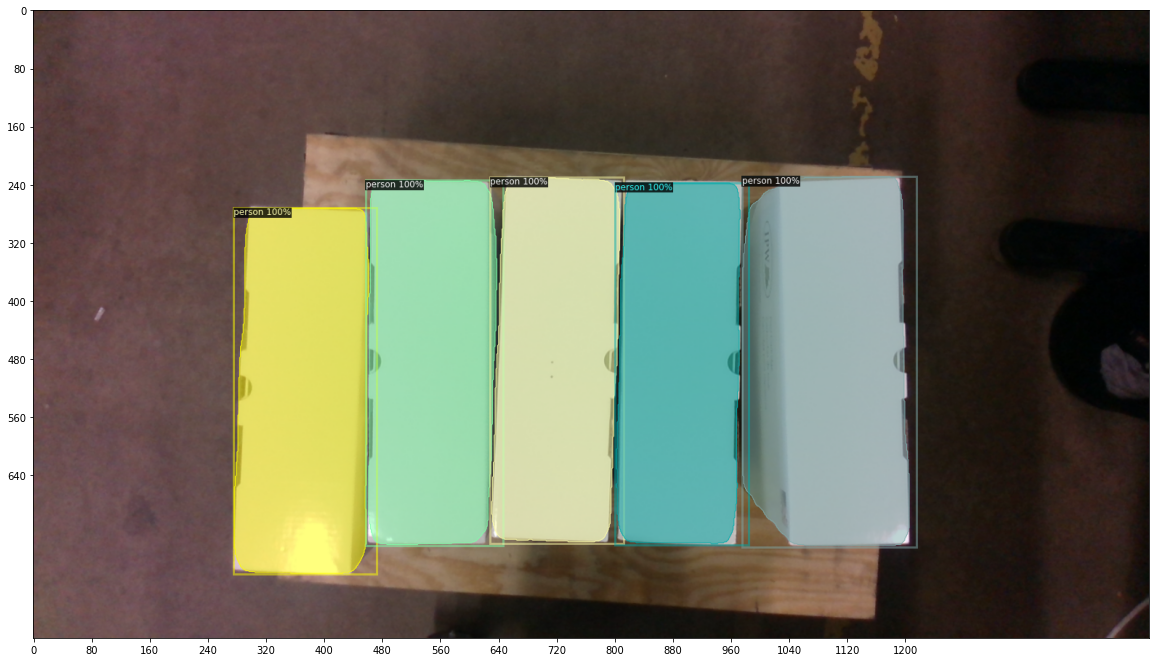




--> Find_Pose [*]

Objects Found: 5

--------- Tick 5 ---------



--> Find_Pose [*]



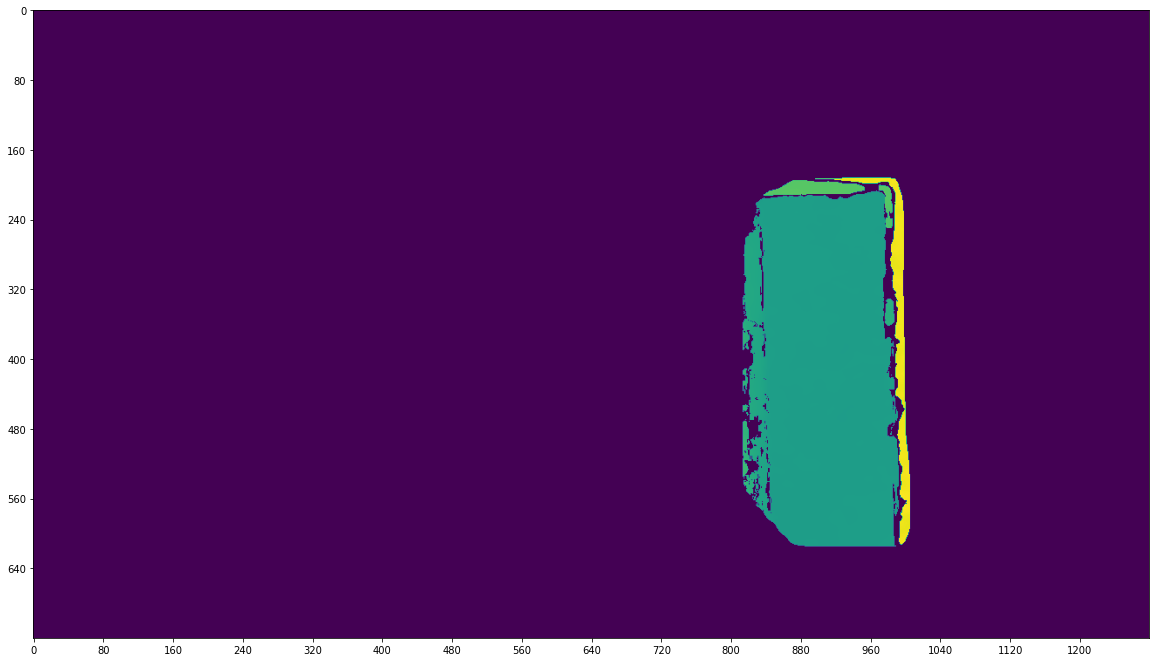


--------- Tick 6 ---------



--> Find_Pose [*]



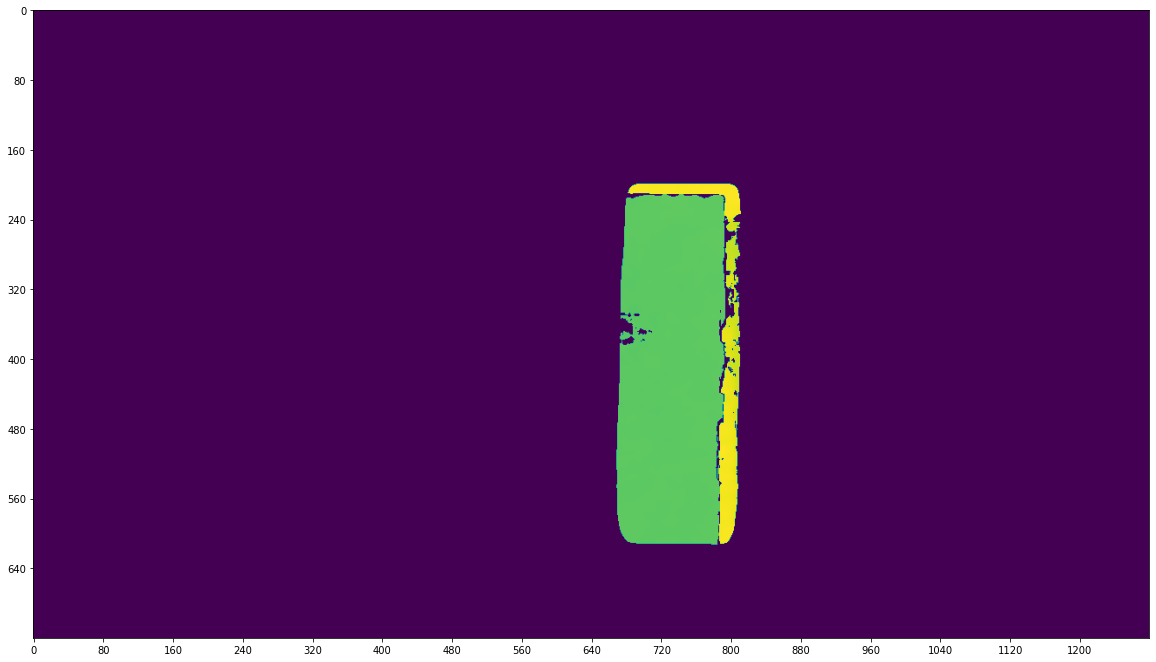


--------- Tick 7 ---------



--> Find_Pose [*]



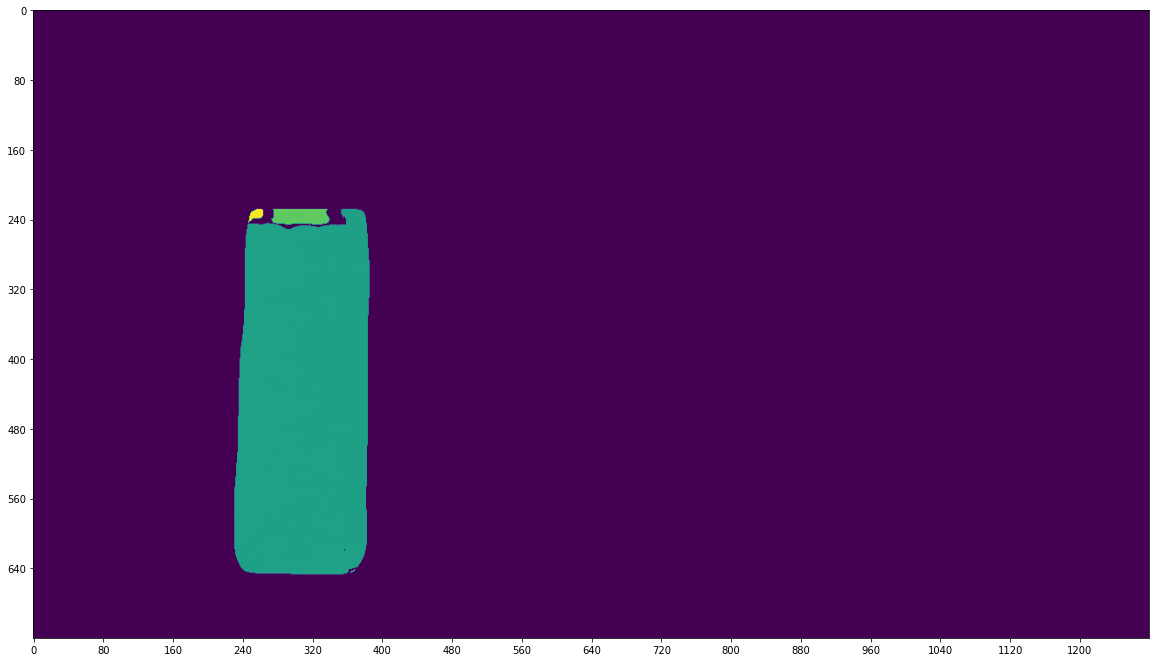


--------- Tick 8 ---------



--> Find_Pose [*]



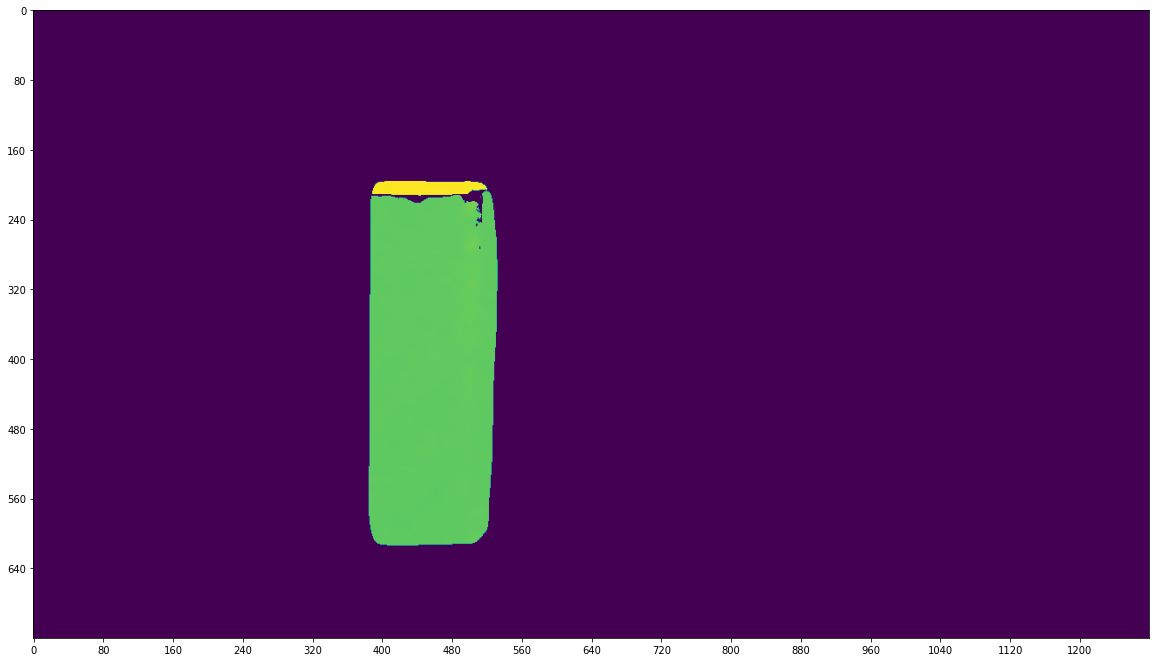


--------- Tick 9 ---------



--> Find_Pose [*]



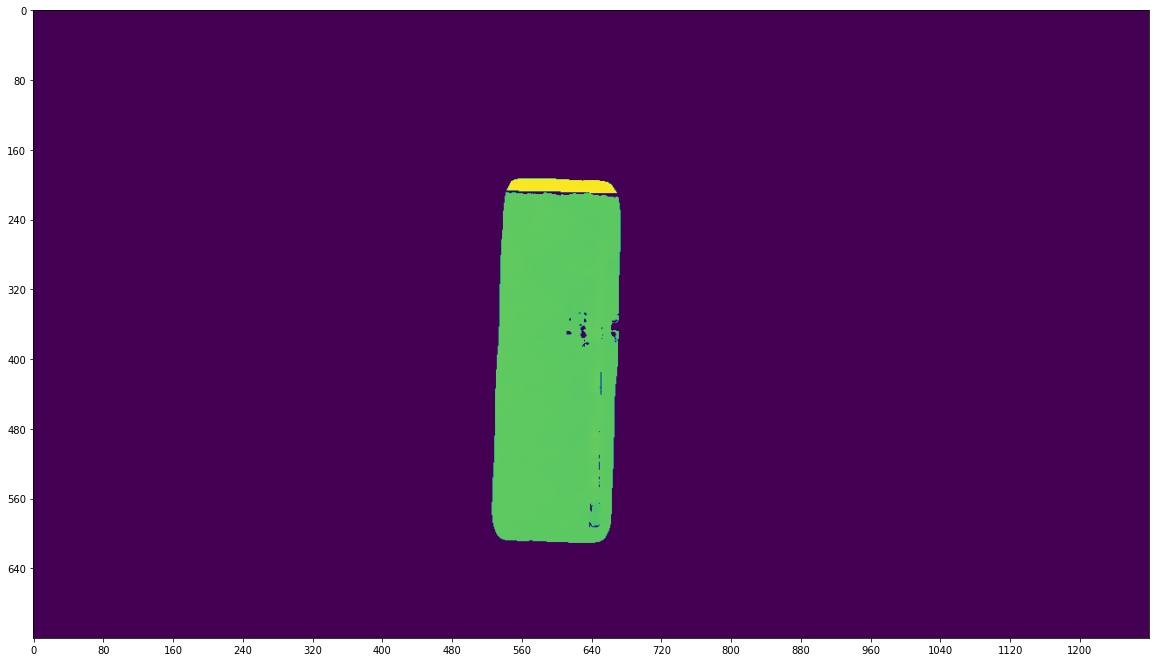


--------- Tick 10 ---------



--> Find_Pose [*]


--------- Tick 11 ---------



--> Find_Pose [*]



Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.035936450411449085, 0.12043507170047744, …


--------- Tick 12 ---------



--> Find_Pose [o]





In [13]:
##########
# Execute
##########
# py_trees.logging.level = py_trees.logging.Level.DEBUG

root.setup_with_descendants() # calls setup on all children
for i in range(500):
    try:
        print("\n--------- Tick {0} ---------\n".format(i))
        root.tick_once()
        print("\n")
        print(py_trees.display.unicode_tree(root=root, show_status=True))
#         print('Type:', type(root.status), 'Value', root.status.value)
        if root.status.value == 'SUCCESS':
            break
        elif root.status.value == 'FAILURE':
            break
        time.sleep(1)
    except KeyboardInterrupt:
        break
print("\n")

# Test Skill 

In [ ]:
parameters = {
    'object' : '5ea0a4d29d2ee14c9fe8c594',
    'quantity' : 3,
    'location' : '5e6bd1b13cff3230a4f5e1d6',
    'pose' : 'cv_2',
    'grip' : False,
    'feature': 'test'
}

In [ ]:
root = skill_templates.pick_and_place.bt_node(parameters, robot)

In [ ]:
py_trees.logging.level = py_trees.logging.Level.DEBUG

############
# Rendering
############
py_trees.display.render_dot_tree(root, with_blackboard_variables=True)

In [ ]:
##########
# Execute
##########
root.setup_with_descendants() # calls setup on all children
for i in range(500):
    try:
        print("\n--------- Tick {0} ---------\n".format(i))
        root.tick_once()
        print("\n")
        print(py_trees.display.unicode_tree(root=root, show_status=True))
#         print('Type:', type(root.status), 'Value', root.status.value)
        if root.status.value == 'SUCCESS':
            break
        time.sleep(1)
    except KeyboardInterrupt:
        break
print("\n")